#### Value at Risk (VaR) Analysis using the Historical Method for a portfolio of stocks using Python.

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt

# Set the time range to a certain number of years and create a list of tickers we want to analyze. 
# In this example, we’ll analyze the past 15 years of stock data.

years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

In [2]:
# Download the daily adjusted close prices for each ticker in our list using the yfinance library.

adj_close_df = pd.DataFrame(yf.download(tickers, start=startDate, end=endDate)['Adj Close'])

print(adj_close_df)

[*********************100%***********************]  5 of 5 completed

Ticker                           BND         GLD         QQQ         SPY  \
Date                                                                       
2009-09-24 00:00:00+00:00  51.578297   97.550003   36.796204   79.794922   
2009-09-25 00:00:00+00:00  51.741123   97.000000   36.472572   79.369385   
2009-09-28 00:00:00+00:00  51.767120   97.050003   37.093571   80.790352   
2009-09-29 00:00:00+00:00  51.767120   97.430000   36.927387   80.547203   
2009-09-30 00:00:00+00:00  51.767120   98.849998   36.953621   80.235657   
...                              ...         ...         ...         ...   
2024-09-16 00:00:00+00:00  75.639999  238.660004  473.239990  562.840027   
2024-09-17 00:00:00+00:00  75.540001  237.339996  473.489990  563.070007   
2024-09-18 00:00:00+00:00  75.309998  235.509995  471.440002  561.400024   
2024-09-19 00:00:00+00:00  75.309998  239.169998  483.359985  570.979980   
2024-09-20 00:00:00+00:00  75.224998  240.520004  483.149994  567.993591   

Ticker     

In [3]:
# Calculate the daily log returns for each stock and drop any NAs from the resulting DataFrame.
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()
print(log_returns)

Ticker                          BND       GLD       QQQ       SPY       VTI
Date                                                                       
2009-09-25 00:00:00+00:00  0.003152 -0.005654 -0.008834 -0.005347 -0.006408
2009-09-28 00:00:00+00:00  0.000502  0.000515  0.016883  0.017745  0.018545
2009-09-29 00:00:00+00:00  0.000000  0.003908 -0.004490 -0.003014 -0.001672
2009-09-30 00:00:00+00:00  0.000000  0.014469  0.000710 -0.003875 -0.003725
2009-10-01 00:00:00+00:00  0.004508 -0.009759 -0.030032 -0.025126 -0.026855
...                             ...       ...       ...       ...       ...
2024-09-16 00:00:00+00:00  0.002648 -0.000084 -0.004428  0.001476  0.001982
2024-09-17 00:00:00+00:00 -0.001323 -0.005546  0.000528  0.000409  0.001008
2024-09-18 00:00:00+00:00 -0.003049 -0.007740 -0.004339 -0.002970 -0.002521
2024-09-19 00:00:00+00:00  0.000000  0.015421  0.024970  0.016920  0.016804
2024-09-20 00:00:00+00:00 -0.001129  0.005629 -0.000435 -0.005244 -0.002698

[3772 rows 

In [4]:
# Create an equally weighted portfolio with a total value of $1,000,000.
portfolio_value = 1000000
weights = np.array([1/len(tickers)]*len(tickers))
print(weights)

[0.2 0.2 0.2 0.2 0.2]


In [5]:
# Calculate the historical portfolio returns.

historical_returns = (log_returns * weights).sum(axis =1)
print(historical_returns)

Date
2009-09-25 00:00:00+00:00   -0.004618
2009-09-28 00:00:00+00:00    0.010838
2009-09-29 00:00:00+00:00   -0.001054
2009-09-30 00:00:00+00:00    0.001516
2009-10-01 00:00:00+00:00   -0.017453
                               ...   
2024-09-16 00:00:00+00:00    0.000319
2024-09-17 00:00:00+00:00   -0.000985
2024-09-18 00:00:00+00:00   -0.004124
2024-09-19 00:00:00+00:00    0.014823
2024-09-20 00:00:00+00:00   -0.000775
Length: 3772, dtype: float64


In [6]:
# Find the X-day historical returns. In this example, we’ll use a 50-day window.
days = 50

range_returns = historical_returns.rolling(window = days).sum()
range_returns = range_returns.dropna()
print(range_returns)

Date
2009-12-04 00:00:00+00:00    0.063422
2009-12-07 00:00:00+00:00    0.065929
2009-12-08 00:00:00+00:00    0.046007
2009-12-09 00:00:00+00:00    0.050065
2009-12-10 00:00:00+00:00    0.051364
                               ...   
2024-09-16 00:00:00+00:00    0.023000
2024-09-17 00:00:00+00:00    0.023533
2024-09-18 00:00:00+00:00    0.018837
2024-09-19 00:00:00+00:00    0.026791
2024-09-20 00:00:00+00:00    0.028572
Length: 3723, dtype: float64


In [7]:
# Specify a confidence interval and calculate the Value at Risk (VaR) using the historical method.
confidence_interval = 0.99

VaR = np.percentile(range_returns, 100 - (confidence_interval * 100))*portfolio_value
print(VaR)

-109874.25445236066


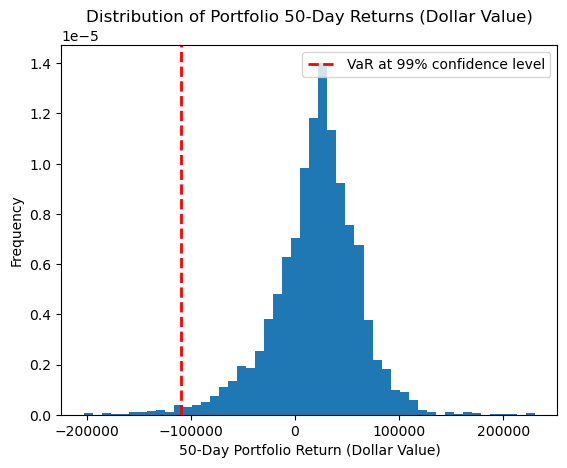

In [8]:
# Plot the results of the historical returns to visualize the distribution of portfolio returns and the VaR at the specified confidence level.

return_window = days
range_returns = historical_returns.rolling(window=return_window).sum()
range_returns = range_returns.dropna()

range_returns_dollar = range_returns * portfolio_value

plt.hist(range_returns_dollar.dropna(), bins=50, density=True)
plt.xlabel(f'{return_window}-Day Portfolio Return (Dollar Value)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {return_window}-Day Returns (Dollar Value)')
plt.axvline(VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()